In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
filename = "/content/diabetes (1).csv"
df= pd.read_csv(filename)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Revisamos cuales son las columnas con datos nulos dentro del dataframe


In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Veemos algunos resumenes estadisticos de la data


*   Podemos notar que el minimo de glucosa, presion,color de piel, insulina, etc es de 0. Lo cual no deberia poder pasar, por lo tanto filtraremos estos datos para todos aquellos mayores a 0.


*   Hay embarazos de 17 hijos como maximo, es posible que pase esto? que edad tiene la persona que tuve 17 hijos?  






In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
gluc_filter = df["Glucose"] > 0
BP_filter = df["BloodPressure"] > 0
Skin_filter=df["SkinThickness"] > 0
Ins_filter=df["Insulin"]> 0
BMI_filter=df["BMI"] > 0
df1 = df.loc[gluc_filter & BP_filter & Skin_filter & Ins_filter & BMI_filter]
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


Reviso la cantidad de hijos que hubo

In [ ]:
df1["Pregnancies"].value_counts()

1     93
2     64
0     56
3     45
4     27
5     21
7     20
6     19
8     14
9     11
10     6
11     5
12     5
13     3
15     1
17     1
14     1
Name: Pregnancies, dtype: int64

Reviso aquellos que tuvieron entre 10 y 17 hijos para ver si hay algo raro respecto a su cantidad de hijos y la edad de la persona. 

pd: no se encontro nada raro


In [ ]:
preg_filter = df1["Pregnancies"]==10
df1[preg_filter]

preg_filter = df1["Pregnancies"]==11
df1[preg_filter]

#preg_filter = df1["Pregnancies"]==12
#df1[preg_filter]

#preg_filter = df1["Pregnancies"]==13
#df1[preg_filter]

#preg_filter = df1["Pregnancies"]==14
#df1[preg_filter]

#preg_filter = df1["Pregnancies"]==15
#df1[preg_filter]

#preg_filter = df1["Pregnancies"]==17
#df1[preg_filter]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
24,11,143,94,33,146,36.6,0.254,51,1
259,11,155,76,28,150,33.3,1.353,51,1
614,11,138,74,26,144,36.1,0.557,50,1
648,11,136,84,35,130,28.3,0.260,42,1
740,11,120,80,37,150,42.3,0.785,48,1


Creo una nueva data con el indice de mas corporal y las edades de la persona para poder visualizarlos en un grafico

Filtrare por aquellos que son menores a 40 y mayores a 40 años


In [ ]:
df2=df1[["BMI","Age"]]
df2.head(100)

,BMI,Age
3,28.1,21
4,43.1,33
6,31.0,26
8,30.5,53
13,30.1,59
...,...,...
198,34.8,26
199,30.9,29
203,20.4,27
204,37.7,55


In [ ]:
may_40 = df2["Age"]>=40
may_40=df2[may_40]
may_40.head()

,BMI,Age
8,30.5,53
13,30.1,59
14,25.8,51
24,36.6,51
25,31.1,41


In [ ]:
men_40 = df2["Age"]<=40
men_40=df2[men_40]
men_40.head()

,BMI,Age
3,28.1,21
4,43.1,33
6,31.0,26
16,45.8,31
18,43.3,33


Se puede ver del grafico que el BMI no depende de la edad de la persona en su gran mayoria 

Se podria decir que hay un BMI aprox de 80 que esta fuera de donde se concentra la mayor cantidad de datos al igual que aquellas edades de 50 para arriba, por lo que creo que se podrian eliminar para que mi modelo tenga una mayor presicion 

Text(1, 3, 'Estan fuera de la concentracion de datos')

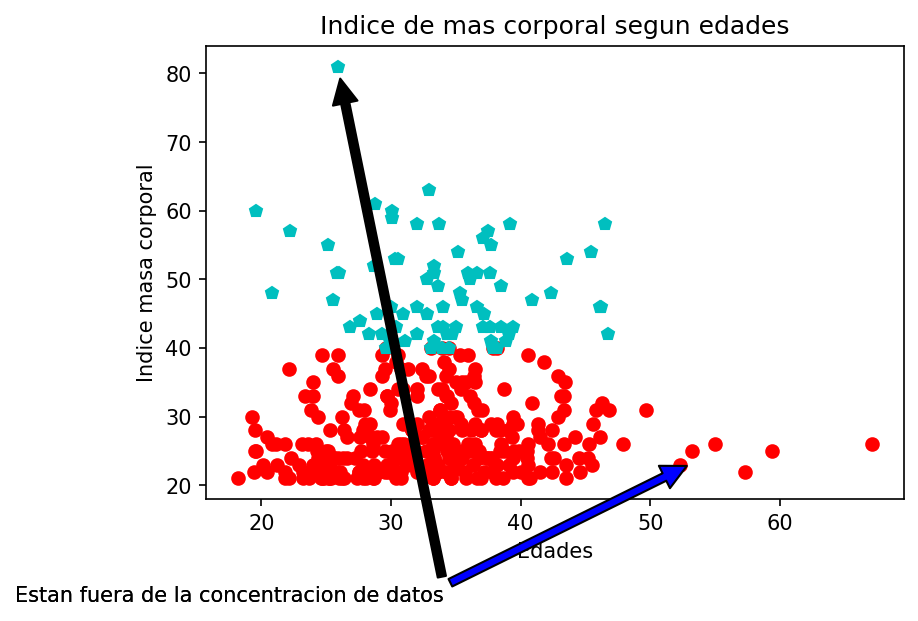

In [ ]:
plt.figure(dpi=150)
plt.plot(men_40["BMI"], men_40["Age"], 'ro', may_40["BMI"], may_40["Age"], 'cp');
plt.xlabel("Edades");
plt.ylabel("Indice masa corporal");
plt.title("Indice de mas corporal segun edades");
plt.annotate('Estan fuera de la concentracion de datos', xy=(26,80), xytext=(1,3), arrowprops=dict(facecolor='black', shrink=0.01))
plt.annotate('Estan fuera de la concentracion de datos', xy=(53,23), xytext=(1,3), arrowprops=dict(facecolor='blue', shrink=0.01))

Quiero graficar segun edad, todo los niveles de insulina, glucos, presion, etc en subplots, para eso primero tengo que crear mi data nuevo


In [ ]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1


In [ ]:
df3=df1[["Age","Glucose","BloodPressure", "SkinThickness","Insulin"]]
df3.head()

,Age,Glucose,BloodPressure,SkinThickness,Insulin
3,21,89,66,23,94
4,33,137,40,35,168
6,26,78,50,32,88
8,53,197,70,45,543
13,59,189,60,23,846


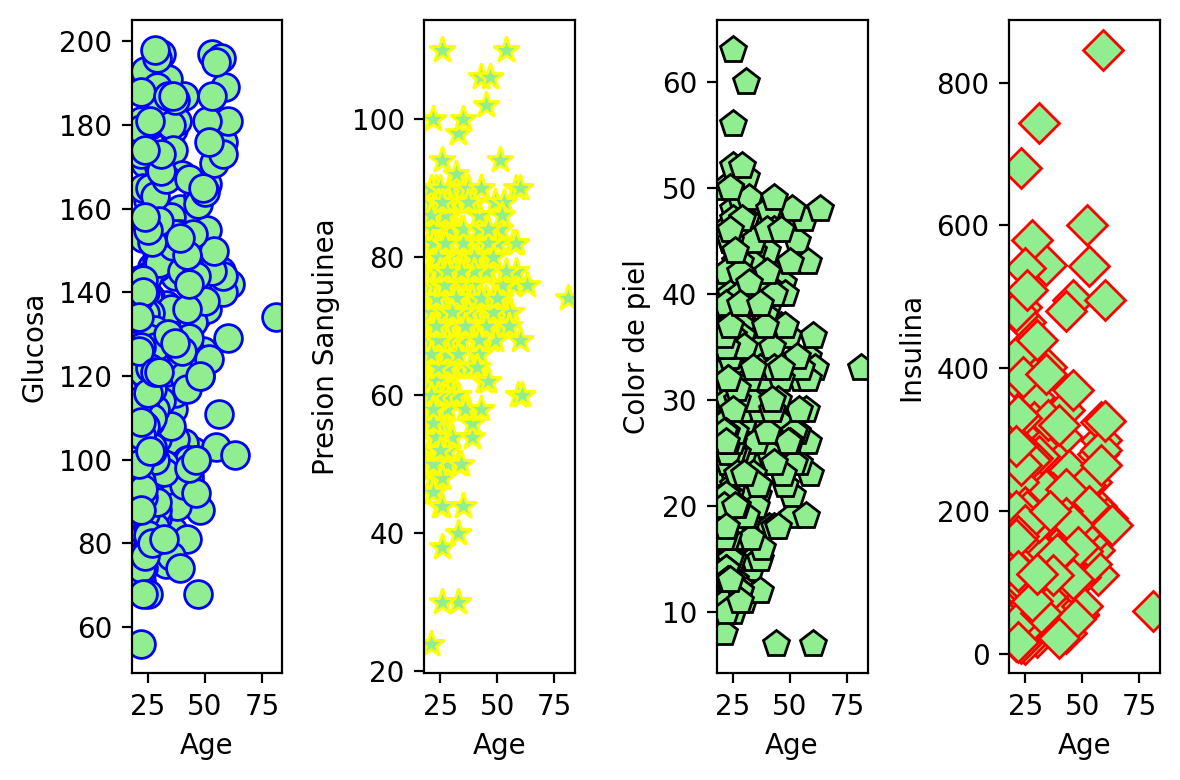

In [ ]:
### figura1 (primer grafico)
fig1 = plt.figure(dpi=200)
ax1 = fig1.add_subplot(1,4,1) #1 fila, 1 columna y gráfico 1.
ax1.plot(df3["Age"], df3["Glucose"], 'o', color="blue", markerfacecolor="lightgreen", lw=2, ms=10)
plt.xlabel("Age")
plt.ylabel("Glucosa")

ax2 = fig1.add_subplot(1,4,2) #1 fila, 1 columna y gráfico 1.
ax2.plot(df3["Age"], df3["BloodPressure"], '*', color="Yellow", markerfacecolor="lightgreen", lw=2, ms=10)
plt.xlabel("Age")
plt.ylabel("Presion Sanguinea")

ax3 = fig1.add_subplot(1,4,3) #1 fila, 1 columna y gráfico 1.
ax3.plot(df3["Age"], df3["SkinThickness"], 'p', color="black", markerfacecolor="lightgreen", lw=2, ms=10)
plt.xlabel("Age")
plt.ylabel("Color de piel")

ax4 = fig1.add_subplot(1,4,4) #1 fila, 1 columna y gráfico 1.
ax4.plot(df3["Age"], df3["Insulin"], 'D', color="red", markerfacecolor="lightgreen", lw=2, ms=10)
plt.xlabel("Age")
plt.ylabel("Insulina")


fig1.tight_layout()

# Nuevos tipos de graficos


Grafico de tortas


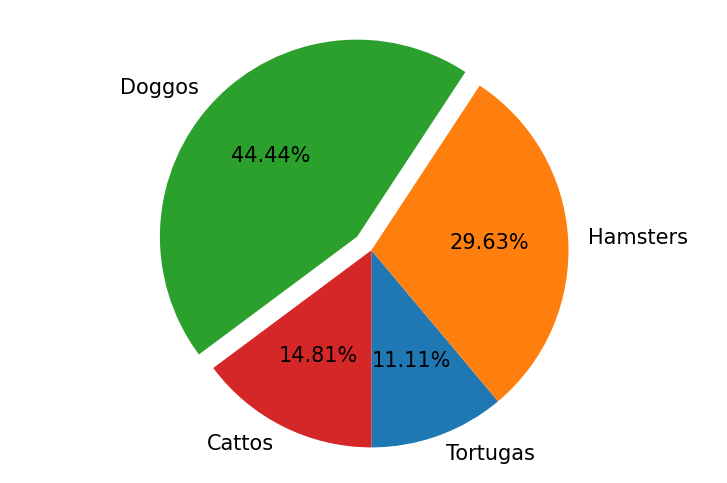

In [ ]:
import matplotlib.pyplot as plt

#Gráfico de torta; cortes ordenados y gráficados contra reloj.
size = [15, 40, 60, 20] 
etiquetas = ["Tortugas","Hamsters","Doggos","Cattos"]
explotar = [0, 0, 0.1, 0] #sirve para destacar alguna porcion. El valor es cuanto se separa de la torta.

fig1 = plt.figure(dpi=150)
ax1 = fig1.add_subplot(1,1,1) 

ax1.pie(size, labels=etiquetas, explode=explotar, autopct="%.2f%%", shadow = False, startangle=-90)
# autopct = porcentaje automático; shadow = grafico con sombra; startangle = ángulo de inicio
# %.2f%% formato de decimal, viene del lenguaje C. Sí, python está escrito en C.

ax1.axis("equal") #asegura proporcion igualitaria, vale decir, suma de porcentajes 100% (círculo)

plt.show()

Grafico de barras


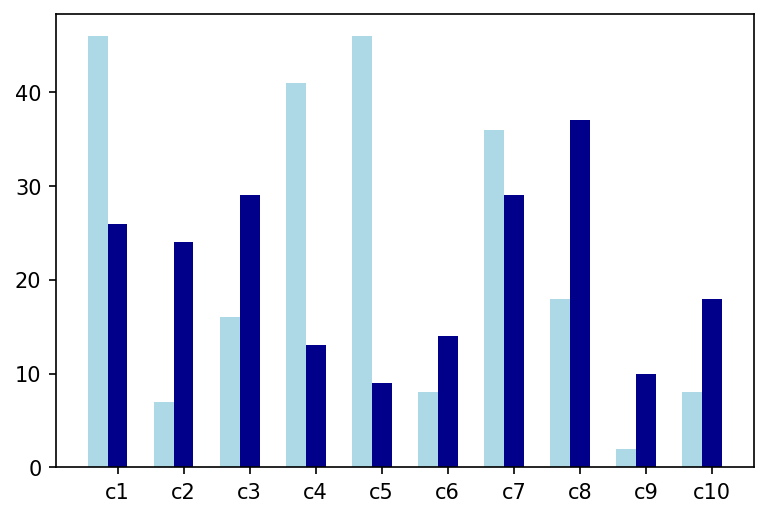

In [ ]:
import matplotlib.pyplot as plt
from numpy import arange
from numpy.random import randint

fig1 = plt.figure(dpi=150)
ax1 = fig1.add_subplot(111)

num = 10
x = arange(num) #rango de 0 a 10
#print(x)

ya = randint(0,50,num) #lista de numeros aleatoreos entre 0 y 50
yb = randint(0,50,num)
#print(ya, yb)

sep = 0.3

#barras - parametro 1: valores de x; parametro 2: valores en y; parametro 3: ancho de barra.
#print(x, ya, yb)
ax1.bar(x, ya, sep, color='lightblue')
#ax1.plot(x, ya, 'gD--', color='green')
ax1.bar(x+sep, yb, sep, color='darkblue')

ax1.set_xticks(x+sep) #posición de etiquetas en x

ax1.set_xticklabels(["c1","c2","c3","c4","c5","c6","c7","c8","c9","c10"]) #nombre de etiquetas en x

plt.show()

Histogramas


[-0.26568514 -0.20839259  0.5561607  ...  0.62344052 -0.34365798
 -0.21652821]


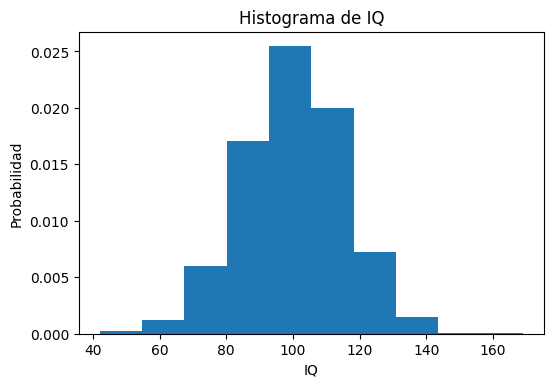

In [ ]:
import matplotlib.pyplot as plt
from numpy.random import seed, randn

#seed(1) #semilla aleatoria fija, permite generar siempre los mismos números.

mu = 100 #media 
sigma = 15 #desviación estándar 

#Muestro desde distribución normal (0,1) adaptada a media y dev.est. de nuestro caso
x = mu + sigma * randn(2000)
print(randn(2000))

#datos histograma
num_bins = 10 #casillas/divisiones del histograma
fig1 = plt.figure(dpi=100)
ax1 = fig1.add_subplot(1,1,1)

#Histograma - 1er argumento: datos del muestreo; 2do argumento: numero de divisiones, 3ero: normalizacion.
#density = True, indica que suma de alturas de las divisiones es 1.
ax1.hist(x, num_bins, density=True)

ax1.set_xlabel("IQ")
ax1.set_ylabel("Probabilidad")
ax1.set_title("Histograma de IQ")

plt.show()

# Libreria Seaborn

Es una biblioteca Python para visualización de datos basada en Matplotlib.

Provee una interfaz de alto nivel para la generación de gráficos atractivos e informativos

Si está trabajando en su entorno local, previo a su importación debe ser instalada

pip install seaborn si usa pip

conda install seaborn si usa conda

In [ ]:
# Ten en cuenta que este cuaderno también está importando la biblioteca seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

filename = '/content/athlete_events.csv'
df = pd.read_csv(filename)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
yearFilter = df['Year'] == 2016
top20Height = df.loc[yearFilter, :].groupby(['NOC'])['Height'].mean().sort_values(ascending = False).head(20)
top20Height


NOC
NIG    193.500000
BIZ    189.500000
TJK    189.000000
SYR    188.800000
ASA    188.000000
CRO    187.608696
LTU    187.548387
CAF    187.000000
ISL    186.500000
ISV    185.000000
MAD    185.000000
MNE    184.789474
GRE    184.313725
LIB    184.000000
PLW    184.000000
BEN    183.750000
SRB    183.717391
MON    183.285714
QAT    183.260870
MLI    182.333333
Name: Height, dtype: float64

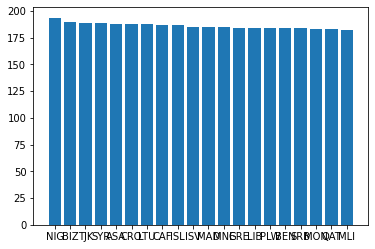

In [ ]:
# Convierta datos de pandas para trazar usando matplotlib
# Ten en cuenta que no es el gráfico más legible
plt.bar(top20Height.index, top20Height.values);

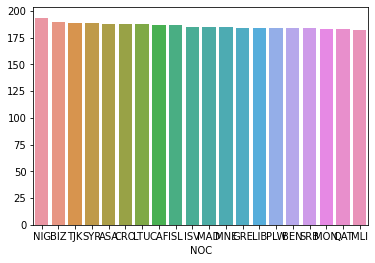

In [ ]:
# Con seaborn, no es necesario convertir datos de pandas si tiene un marco de datos,
# sin embargo, nuestros datos son una serie pandas, debes convertirlos.
# Ten en cuenta que no es el gráfico más legible
sns.barplot(x = top20Height.index, y = top20Height.values);

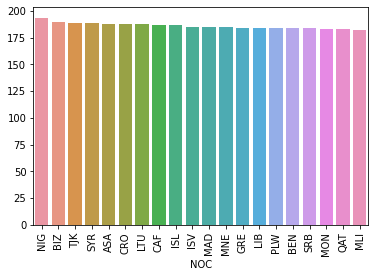

In [ ]:
sns.barplot(x = top20Height.index, y = top20Height.values);
plt.xticks(rotation = 90);

# Ejercicios 

In [ ]:
filename = "/content/notas-genero.csv"
df= pd.read_csv(filename,sep="	")
df.head()

,Nombre,Nota,Genero
0,SEBASTIÁN ISRAEL,79,M
1,DANIEL ANTONIO,67,M
2,CRISTIAN ALBERTO,78,M
3,MARÍA GABRIELA,54,F
4,JOSÉ ANTONIO,79,M


In [ ]:
df.isna().sum()

Nombre    0
Nota      0
Genero    0
dtype: int64

In [ ]:
df.describe()

,Nota
count,25.00000
mean,70.00000
std,14.71677
min,16.00000
25%,66.00000
50%,73.00000
75%,79.00000
max,86.00000


In [ ]:
df["Nota"].value_counts()

68    3
79    2
78    2
54    2
75    2
86    2
85    2
66    1
80    1
72    1
16    1
62    1
73    1
67    1
57    1
76    1
63    1
Name: Nota, dtype: int64

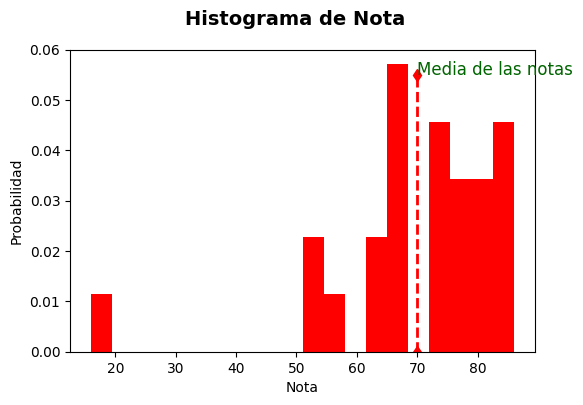

In [ ]:
import matplotlib.pyplot as plt
from numpy.random import seed, randn

#seed(1) #semilla aleatoria fija, permite generar siempre los mismos números.

mu = 70.00000 #media 
sigma = 14.71677 #desviación estándar 

#Muestro desde distribución normal (0,1) adaptada a media y dev.est. de nuestro caso
x = mu + sigma * df["Nota"]

#datos histograma
num_bins = 10 #casillas/divisiones del histograma
fig1 = plt.figure(dpi=100);
ax1 = fig1.add_subplot(1,1,1);

#Histograma - 1er argumento: datos del muestreo; 2do argumento: numero de divisiones, 3ero: normalizacion.
#density = True, indica que suma de alturas de las divisiones es 1.
ax1.hist(df["Nota"], bins=20, color="red", density=True);


fig1.suptitle("Histograma de Nota", fontsize=14, fontweight="bold")
ax1.text(70,0.055, 'Media de las notas', color="darkgreen", fontsize=12)
ax1.plot([70,70],[0,0.055], 'rd--', lw=2)


ax1.set_xlabel("Nota");
ax1.set_ylabel("Probabilidad");
plt.show();


[-0.10653357 -0.84539709 -1.36621323  0.32431527  0.98144508 -0.96820925
 -0.8603365   1.53863162  0.71832643 -1.11834674 -1.41584162  0.36223129
 -1.2725142  -0.05360176 -0.47777607  0.23371142 -1.29573042 -0.75967826
  1.43364991 -0.11965072 -2.21786588 -1.53262766  0.37822298 -0.96892248
  0.17498096]


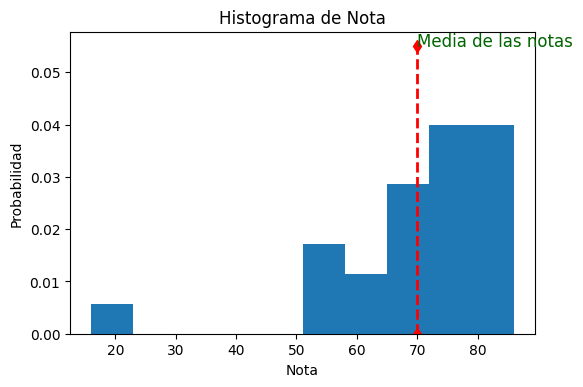

In [ ]:
import matplotlib.pyplot as plt
from numpy.random import seed, randn

#seed(1) #semilla aleatoria fija, permite generar siempre los mismos números.

mu = 70 #media 
sigma = 14.71677 #desviación estándar 

#Muestro desde distribución normal (0,1) adaptada a media y dev.est. de nuestro caso
x = mu + sigma * randn(25);
print(randn(25));

#datos histograma
num_bins = 10 #casillas/divisiones del histograma
fig1 = plt.figure(dpi=100);
ax1 = fig1.add_subplot(1,1,1);

#Histograma - 1er argumento: datos del muestreo; 2do argumento: numero de divisiones, 3ero: normalizacion.
#density = True, indica que suma de alturas de las divisiones es 1.
ax1.hist(df["Nota"], num_bins, density=True);

ax1.set_xlabel("Nota");
ax1.set_ylabel("Probabilidad");
ax1.set_title("Histograma de Nota");

ax1.text(70,0.055, 'Media de las notas', color="darkgreen", fontsize=12);
ax1.plot([70,70],[0,0.055], 'rd--', lw=2);


In [ ]:
df=df.sort_values("Nota",ascending=False)
df.head()

,Nombre,Nota,Genero
24,VALENTINA BELEN,86,F
19,LILIAN XIMENA,86,F
18,JOSE MANUEL,85,M
21,MATÍAS ANTONIO,85,M
20,BRYAN FABRICIO,80,M


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


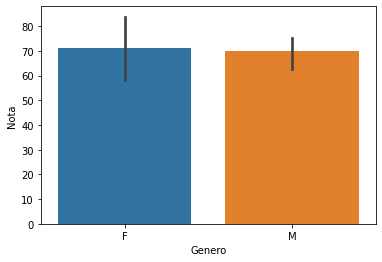

In [ ]:
sns.barplot(df["Genero"], y = df["Nota"]);

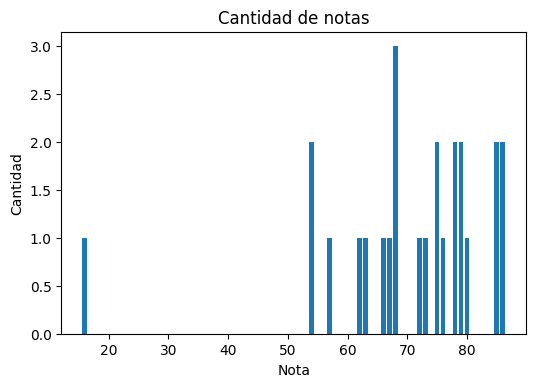

In [ ]:
a=df.groupby('Nota')['Nota'].count()
fig = plt.figure(dpi=100)
ax1 = fig.add_subplot(1,1,1)
ax1.bar(a.index, a.values)
ax1.set_xlabel("Nota");
ax1.set_ylabel("Cantidad");
ax1.set_title("Cantidad de notas");


In [ ]:
aprobados=(df['Nota'] >= 60)
aprobados=df[aprobados]
aprobados.head()

,Nombre,Nota,Genero
24,VALENTINA BELEN,86,F
19,LILIAN XIMENA,86,F
18,JOSE MANUEL,85,M
21,MATÍAS ANTONIO,85,M
20,BRYAN FABRICIO,80,M


In [ ]:
a=aprobados.groupby("Genero")["Genero"].count()
a

Genero
F     3
M    18
Name: Genero, dtype: int64

In [ ]:
reprobados=(df['Nota'] < 60)
reprobados=df[reprobados]
reprobados.head()


,Nombre,Nota,Genero
9,OSCAR IGNACIO,57,M
3,MARÍA GABRIELA,54,F
23,HELEN ANNY,54,F
10,CRISTOBAL ALFREDO,16,M


In [ ]:
r=reprobados.groupby("Genero")["Genero"].count()
r

Genero
F    2
M    2
Name: Genero, dtype: int64

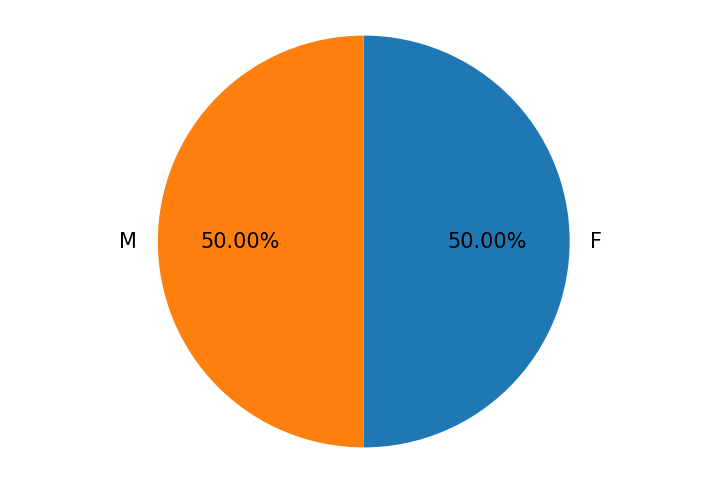

In [ ]:
import matplotlib.pyplot as plt

#Gráfico de torta; cortes ordenados y gráficados contra reloj.
size = r.values
etiquetas = r.index
#explotar = [0, 0, 0.1, 0] #sirve para destacar alguna porcion. El valor es cuanto se separa de la torta.

fig1 = plt.figure(dpi=150)
ax1 = fig1.add_subplot(1,1,1) 

ax1.pie(size, labels=etiquetas, autopct="%.2f%%", shadow = False, startangle=-90)
# autopct = porcentaje automático; shadow = grafico con sombra; startangle = ángulo de inicio
# %.2f%% formato de decimal, viene del lenguaje C. Sí, python está escrito en C.

ax1.axis("equal") #asegura proporcion igualitaria, vale decir, suma de porcentajes 100% (círculo)

plt.show()